In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataTrain = pd.read_csv('/content/drive/MyDrive/Học máy/preprocessing-data/csv/datatrain.csv')
dataTest = pd.read_csv('/content/drive/MyDrive/Học máy/preprocessing-data/csv/datatest.csv')

In [4]:
file = open("/content/drive/MyDrive/Học máy/preprocessing-data/dictionary.txt",  encoding="utf8")
strs = file.read().split("\n")
strs=strs[:len(strs)-1]
keys=[]
for line in strs:
    s=line.split(" ")
    keys.append(s[0])

cv=CountVectorizer(vocabulary=keys)
word_count_vector=cv.fit_transform(dataTrain['content'])
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

def computing_tfidf(s):
    input_s =[]
    input_s.append(s)
    count_vector=cv.transform(input_s) 
    tf_idf_vector=tfidf_transformer.transform(count_vector)
    
    values=tf_idf_vector.toarray().tolist()[0]
    # dictionary = dict(zip(keys, values))
    return values

In [ ]:
dep = len(computing_tfidf(dataTrain.iloc[0]['content']))
import torch

In [ ]:
X_train = torch.zeros((dataTrain.shape[0],dep))
for x in range(dataTrain.shape[0]):
    if x %10000 ==0:
        print(x)
    X_train[x] = torch.FloatTensor(computing_tfidf(dataTrain.iloc[x]['content']))
    

0
10000
20000
30000
40000
50000


In [ ]:
X_test = torch.zeros((dataTest.shape[0],dep))
for x in range(dataTest.shape[0]):
    if x %10000 ==0:
        print(x)
    X_test[x] = torch.FloatTensor(computing_tfidf(dataTest.iloc[x]['content']))
    

0
10000
20000


In [ ]:
def disZ(Z,X):
    X2 = torch.ones(X.shape[0])
    Z2 = torch.ones(Z.shape[0])
    return Z2.reshape(-1,1) + X2.reshape(1,-1) - 2*torch.matmul(Z,X.T)

In [ ]:
dataTest.shape

(25240, 2)

In [ ]:
Y_train = dataTrain['lable']

In [ ]:
def predict():
    Y_pred = []
    k = int(np.sqrt(X_train.shape[0]))
    # step = [[0,10000],[10000,20000],[20000,X_test.shape[0]]]
    for x in range(0,25000,1000):
        X = 0
        dis = 0
        tm = 0
        dis = disZ(X_test[x:x+1000],X_train)
        X = torch.argsort(dis,dim=1)
        X = X[:,0:k]
        # for i in range(dis.shape[0]):
        #     if i % 500==0:
        #         print(i)
        #     tm = torch.argsort(dis[i])
        #     X.append(tm[0:k])
        for i in range(dis.shape[0]):
            if i % 1000 ==0:
                print(i)
            sum = torch.zeros((10))
            for j in X[i]:
                sum[int(Y_train[j.item()])] += 1/dis[i][j.item()]
            Y_pred.append(torch.argmax(sum))
    return Y_pred

In [ ]:
Y_pred = predict()

In [ ]:
dataTest.shape

(25240, 2)

In [ ]:
dis = disZ(X_test[25000:dataTest.shape[0]],X_train)
X = torch.argsort(dis,dim=1)
X = X[:,0:k]
# for i in range(dis.shape[0]):
#     if i % 500==0:
#         print(i)
#     tm = torch.argsort(dis[i])
#     X.append(tm[0:k])
for i in range(dis.shape[0]):
    if i % 1000 ==0:
        print(i)
    sum = torch.zeros((10))
    for j in X[i]:
        sum[int(Y_train[j.item()])] += 1/dis[i][j.item()]
    Y_pred.append(torch.argmax(sum))

0


In [ ]:
y_pred =[]
for x in Y_pred:
    y_pred.append(x.item())

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,y_pred,average=None)*100

In [ ]:
from sklearn.metrics import precision_score, recall_score

ps = precision_score(Y_test,y_pred,average=None)*100

In [ ]:
rc = recall_score(Y_test,y_pred,average=None)*100

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
f1 = np.round(f1,2)
ps = np.round(ps,2)
rc = np.round(rc,2)

In [ ]:
f1_w2v = [51.35,81.57,55.81,76.3,74.6,85.7,85.83,93.16,86.15,82.09]

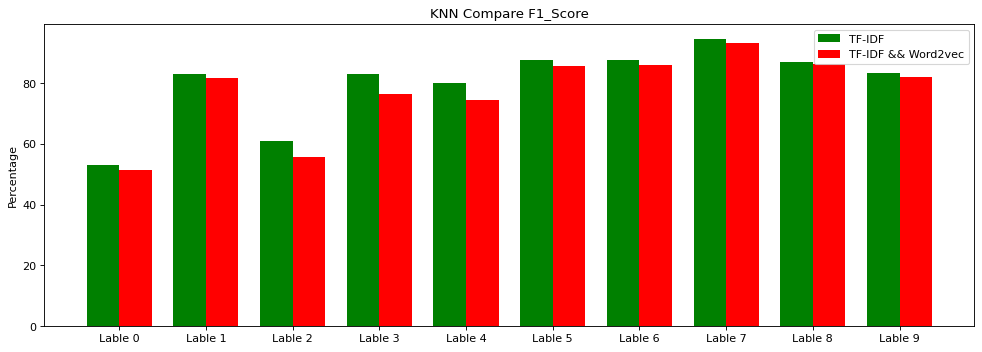

In [ ]:
divisions = ["Lable 0","Lable 1","Lable 2","Lable 3","Lable 4","Lable 5","Lable 6","Lable 7","Lable 8","Lable 9"]
width = 1.5

plt.figure(figsize=(15,5), dpi=80)
index = np.arange(0,40,4)
plt.bar(index -  width/2,f1,width=width,color='green',label='TF-IDF')
plt.bar(index + width/2, f1_w2v, width = width,color='red', label='TF-IDF && Word2vec')

plt.xticks(index,divisions)
# for index, value in enumerate(f1):
#     plt.text(index*2-0.5, value+1,
#              str(value))



plt.ylabel('Percentage')
# plt.xlabel('Recall_score')
plt.title('KNN Compare F1_Score')
plt.legend(loc='best')
plt.savefig('KNN Compare F1_Score.png')
plt.show()

In [ ]:
f1_ann = [51.38,78.77,60.52,76.92,75.0,84.06,84.26,91.68,85.58,84.52]
f1_knn = [51.35,81.57,55.81,76.3,74.6,85.7,85.83,93.16,86.15,82.09]
f1_lstm = [57.59,85.51,72.84,88.35,81.63,90.2,89.02,96.59,91.61,89.1]
f1_svm = [62.38,84.47,66.1,83.22,79.26,88.67,88.26,95.43,90.04,87.92]

In [ ]:
index - width*2

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38])

In [ ]:
index - width

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39])

In [ ]:
index = np.arange(4,44,4)
index

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40])

In [ ]:
index +  width

array([ 5,  9, 13, 17, 21, 25, 29, 33, 37, 41])

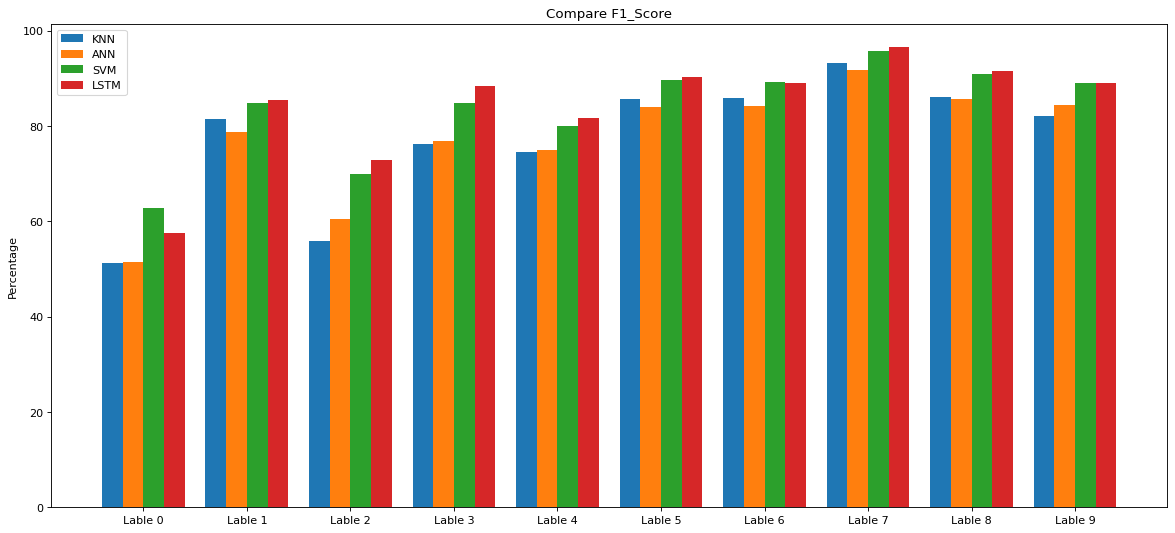

In [ ]:
divisions = ["Lable 0","Lable 1","Lable 2","Lable 3","Lable 4","Lable 5","Lable 6","Lable 7","Lable 8","Lable 9"]
width = 1
f1_ann = [51.38,78.77,60.52,76.92,75.0,84.06,84.26,91.68,85.58,84.52]
f1_knn = [51.35,81.57,55.81,76.3,74.6,85.7,85.83,93.16,86.15,82.09]
f1_lstm = [57.59,85.51,72.84,88.35,81.63,90.2,89.02,96.59,91.61,89.1]
f1_svm = [62.86,84.75,69.98,84.84,80.06,89.73,89.21,95.72,90.85,89.04]

plt.figure(figsize=(18,8), dpi=80)
index = np.arange(5,55,5)
plt.bar(index -  width*3/2,f1_knn,width=width,label='KNN')
plt.bar(index - width/2, f1_ann, width = width, label='ANN')
plt.bar(index +  width/2,f1_svm,width=width,label='SVM')
plt.bar(index + width*3/2, f1_lstm, width = width, label='LSTM')

plt.xticks(index,divisions)
# for index, value in enumerate(f1):
#     plt.text(index*2-0.5, value+1,
#              str(value))



plt.ylabel('Percentage')
# plt.xlabel('Recall_score')
plt.title('Compare F1_Score')
plt.legend(loc='best')
plt.savefig('Compare F1_Score.png')
plt.show()